## Tenemos un dataset de reviews de peliculas , ya clasificados como positivos y negativos. Vamos a entrenar un modelo predictivo para que basado en la informacion existente , un nuevo ingreso de review sea automaticamente clasificada como positiva o negativa . Esto serviria para guiar un sistema de recomendacion eficaz mas adelante .

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.datasets import load_files
moviedir = r'C:/Users/alejandro/Desktop/Data Set.csv/rev/dataset/movie_reviews' 
movie_reviews = load_files(moviedir, shuffle=True)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    movie_reviews.data, movie_reviews.target, test_size = 0.20, stratify=movie_reviews.target, random_state = 12)

In [4]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
import nltk
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\alejandro\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [11]:
X_train[1][:301]

b' " when will the devil take me ? " he asks rhetorically in lulling voice over . \nthe spoiled title character of _onegin_ ( pronounced oh-negg-in ) is waiting on death to relieve him after a lifetime of rapacious behaviour . \nmartha fiennes\' debut feature is ( quite literally ) filmed poetry ( it\'s ba'

**Vectorizamos :**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
Vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer()
X_train = Vectorizer.fit_transform(X_train)
X_test = Vectorizer.transform(X_test)


### Support Vector Machines (SVM)

In [14]:
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10],'loss':['hinge', 'squared_hinge']}]

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
clf = LinearSVC()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', verbose=True)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
a = accuracy_score(y_test, y_pred)
print("Presenta un Accuracy de",a)

Presenta un Accuracy de 0.85


In [29]:
optimised_svm = grid_search.best_estimator_

Confusion matrix, without normalization
[[165  35]
 [ 25 175]]


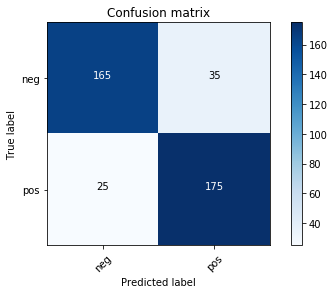

In [30]:
from sklearn.metrics import confusion_matrix
optimised_svm.fit(X_train, y_train)
y_pred = optimised_svm.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred) 
clases = ['neg','pos']
plot_confusion_matrix(conf_matrix, clases)

## Random Forest

In [31]:
param_grid = [{'n_estimators':[100, 500, 1000],'max_depth':[3, 7, None], 'min_samples_leaf':[2, 3, 10], 'bootstrap':[True,False], 'criterion':["gini","entropy"]},]

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RFC_clf = RandomForestClassifier()
grid_search2 = GridSearchCV(RFC_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=1, return_train_score=True)

In [35]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'n_estimators': [100, 500, 1000], 'max_depth': [3, 7, None], 'min_samples_leaf': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [38]:
from sklearn.metrics import accuracy_score
y_pred = grid_search2.predict(X_test)
b = accuracy_score(y_test, y_pred)
print("Presenta un Accuracy de",b)

Presenta un Accuracy de 0.8275


Confusion matrix, without normalization
[[174  26]
 [ 43 157]]


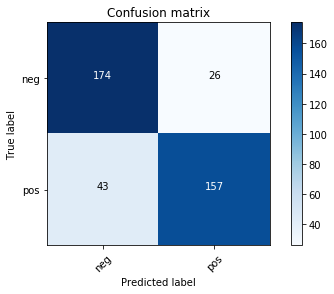

In [39]:
y_pred = grid_search2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred) 
clases = ['neg','pos']
plot_confusion_matrix(conf_matrix, clases)

## Multilayer Perceptron


In [40]:
param_grid = [{'hidden_layer_sizes':[(10,),(5,5),(2,2)]}]

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier()
grid_search3 = GridSearchCV(MLPC, param_grid, cv=5, scoring='roc_auc', verbose=1, return_train_score=True)

In [42]:
grid_search3.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 11.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'hidden_layer_sizes': [(10,), (5, 5), (2, 2)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [45]:
from sklearn.metrics import accuracy_score
y_pred = grid_search3.predict(X_test)
c = accuracy_score(y_test, y_pred)
print("Presenta un Accuracy de",c)

Presenta un Accuracy de 0.85


Confusion matrix, without normalization
[[170  30]
 [ 30 170]]


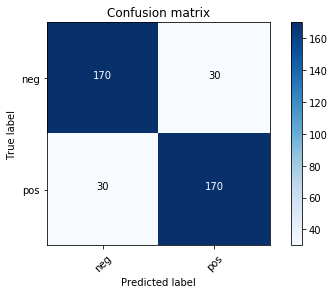

In [51]:
y_pred = grid_search3.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred) 
clases = ['neg','pos']
plot_confusion_matrix(conf_matrix, clases)

## Adaboost

In [46]:
param_grid = {'n_estimators':[50, 100, 500]}

In [48]:
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier()
grid_search4 = GridSearchCV(AdaB, param_grid, cv=5, scoring='roc_auc', verbose=1, return_train_score=True)

In [49]:
grid_search4.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  8.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [54]:
from sklearn.metrics import accuracy_score
y_pred_ada = grid_search4.predict(X_test)
d = accuracy_score(y_test, y_pred)
print("Presenta un Accuracy de",d)

Presenta un Accuracy de 0.8


Confusion matrix, without normalization
[[163  37]
 [ 43 157]]


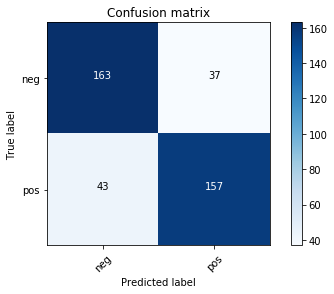

In [55]:
y_pred = grid_search4.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred) 
clases = ['neg','pos']
plot_confusion_matrix(conf_matrix, clases)

## Realizamos un voting , para definir cual modelo funciono mejor :


Confusion matrix, without normalization
[[163  43]
 [ 37 157]]


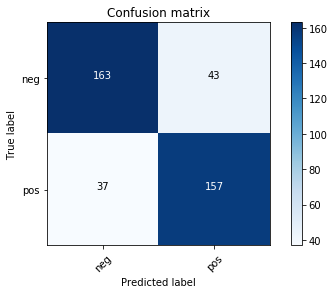

Area bajo la curva ROC: 0.8346720214190094
Classification Report:

                precision    recall  f1-score   support

         neg       0.78      0.91      0.84       200
         pos       0.89      0.74      0.81       200

   micro avg       0.82      0.82      0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 

RFC_clf = RandomForestClassifier()
clf = LinearSVC()      
MLPC = MLPClassifier()    
AdaB = AdaBoostClassifier()
voting_clf= VotingClassifier(estimators = [('Linear', clf), ('Random', RFC_clf), ('Multi', MLPC), ('ADA', AdaB)], voting='hard')
    
voting_clf.fit(X_train, y_train)
y_pred_vcfl = voting_clf.predict(X_test)      
               
classes = ['neg', 'pos'] 
cm_voting_clf= confusion_matrix(y_pred_ada, y_test)
plot_confusion_matrix(cm_voting_clf, classes)


auc_score_voting_clf= roc_auc_score(y_pred_vcfl, y_test)
print('Area bajo la curva ROC: {}'. format(auc_score_voting_clf))
print('Classification Report:\n\n ', classification_report(y_test, y_pred_vcfl, target_names=['neg', 'pos']))

In [61]:
classifiers = [clf, RFC_clf, MLPC, AdaB, voting_clf ]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LinearSVC 0.85
RandomForestClassifier 0.675
MLPClassifier 0.855
AdaBoostClassifier 0.75
VotingClassifier 0.83


## Reentrenamos los datos con le modelo que " gano" el voting :

In [62]:
from sklearn.externals import joblib
joblib.dump(voting_clf, 'sentiment.pkl')
voting_clf = joblib.load('sentiment.pkl ')
voting_clf.fit(X_train, y_train)

y_pred= voting_clf.predict(X_test)

## Ingreso de nueva informacion :

In [89]:
reviews_new = ["This is a test , this review is very good",
               "This is a test , this review is very bad",
               "Yeah, this movie sucks.",
               "My favourite rocky film! So good so much heart. Slightly better than 2",
               "What has this got to do with boxing. Also everyone looked like dolls. Also if you are a real true boxing fan (not casuals), you would understand that this stupidity is no description of boxing!!",
               "The new film's narrative is stripped down to essentials, which gives it an emblematic quality.",
               "Absurdly ridiculous, this just isn't a good movie at all", 
               "Very basic and predictable but still an okay movie. No special music to save this one.", 
              "Rocky 4 is an extremely ambitious movie that is definitely worth watching.",
              'Highly beautiful',
               "If it wasn't for the robots (WTF????), and the painfully overwritten lines of an absurdly dogmatic persuasion, then this would otherwise be nothing more than an interminable series of mildly rousing montages. There are some unintentionally funny bits though, and Dolph's Ivan showcases the best and worst of all Rocky's opponents.",
              "While all aspects of realism is thrown out the window, ROCKY IV is an adrenaline rush of action and excitment, with an incredible soundtrack and arguably the best movie fight in history between Balboa and Drago",
              "Just like the songs, exercise routines and repetitive clips, it seems redundant to add another installment in this already falling franchise when you clearly lack material. Rocky IV is petty, childish and seems overlong despite of its 91 minutes of run time for it merely has an idea of a TV drama episode which is stretched to a point of exhaustion. Its painful to watch Sylvester Stallone go through this enormous amount of training and hardly make a point out there. He fails on all the levels here; writer, director and actor, to deliver any loose end of the thread for the audience to hang on to. Rocky IV is predictable, loosely written and choreographed and executed unsupervised.",
              "I enyoed this movie",
              "I am Yari , this movie fucking sucks",
              "I like stallone",
              "I dont care about this movie",
              "I enjoyed the last fight",
              "Me parecio una pelicula decente",
              "I'm not always happy",
              "Maybe i enjoyed it , i'm not sure",
              "Such a great movie , im coming backc"]
reviews_new_counts = Vectorizer.transform(reviews_new)
reviews_new_tfidf = Vectorizer.transform(reviews_new)

In [90]:
pred = clf.predict(reviews_new_tfidf)

In [91]:
for review, category in zip(reviews_new, pred):
    print('%r => %s \n' % (review, movie_reviews.target_names[category]))

'This is a test , this review is very good' => pos 

'This is a test , this review is very bad' => neg 

'Yeah, this movie sucks.' => neg 

'My favourite rocky film! So good so much heart. Slightly better than 2' => pos 

'What has this got to do with boxing. Also everyone looked like dolls. Also if you are a real true boxing fan (not casuals), you would understand that this stupidity is no description of boxing!!' => neg 

"The new film's narrative is stripped down to essentials, which gives it an emblematic quality." => neg 

"Absurdly ridiculous, this just isn't a good movie at all" => neg 

'Very basic and predictable but still an okay movie. No special music to save this one.' => neg 

'Rocky 4 is an extremely ambitious movie that is definitely worth watching.' => pos 

'Highly beautiful' => pos 

"If it wasn't for the robots (WTF????), and the painfully overwritten lines of an absurdly dogmatic persuasion, then this would otherwise be nothing more than an interminable series of m